#### Import thư viện cần thiết

In [1]:
# importing module
import numpy as np
from pandas import *
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.random.seed(42)

##### Đọc file

Bỏ cột `Serial No`

In [2]:
# reading CSV file
data = read_csv("Admission_Predict.csv")
# converting column data to list, then convert list to array
data.drop(labels='Serial No.', axis=1, inplace=True)

## A

##### Đọc dữ liệu, chọn ra 350 dòng đầu làm dữ liệu training, phần còn lại là dữ liệu test. Đổi các dòng dữ liệu sang dạng cột

In [3]:
# chọn ra 350 dòng đầu làm dữ liệu training, 50 dòng cuối làm dữ liệu test
gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)
X1_train = np.array([X1[:350]]).T
X1_test = np.array([X1[-50:]]).T
tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)
X2_train = np.array([X2[:350]]).T
X2_test = np.array([X2[-50:]]).T
unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)
X3_train = np.array([X3[:350]]).T 
X3_test = np.array([X3[-50:]]).T 
sop = data['SOP'].tolist()
X4 = np.asarray(sop)
X4_train = np.array([X4[:350]]).T
X4_test = np.array([X4[-50:]]).T
lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)
X5_train = np.array([X5[:350]]).T 
X5_test = np.array([X5[-50:]]).T 
cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)
X6_train = np.array([X6[:350]]).T
X6_test = np.array([X6[-50:]]).T
research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)
X7_train = np.array([X7[:350]]).T
X7_test = np.array([X7[-50:]]).T
prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)
y_train = np.array(Yt[:350])
y_test = np.array(Yt[-50:])

##### Sắp xếp dữ liệu để có ma trận dữ liệu X = (X1, X2, ..., X7).

Kết hợp standard scaler

In [4]:
scaler = StandardScaler()
# Sắp xếp dữ liệu để có ma trận dữ liệu X = (X1,...X7)
X_train = np.concatenate([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, X7_train], axis=1)
X_train = scaler.fit_transform(X_train)
X_test = np.concatenate([X1_test, X2_test, X3_test, X4_test, X5_test, X6_test, X7_test], axis=1)
X_test = scaler.transform(X_test)

##### Bổ sung cột X0 ≡ 1 vào bên trái của ma trận X để được Xbar.

In [5]:
# Bổ sung cột X0 ≡ 1 vào bên trái của ma trận X để được Xbar.
one = np.ones((X_train.shape[0], 1))
Xbar = np.concatenate((one, X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)),X_test), axis=1)

##### Gọi các hàm để thực hiện quá trình tính hệ số bằng hồi quy logistic.

In [6]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

d = (Xbar.T).shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(Xbar.T, y_train, w_init, eta=0.05)

##### In hệ số ra màn hình

In [7]:
print(w[-1])

[[ 1.08762957]
 [ 0.1203306 ]
 [ 0.11322414]
 [ 0.07866573]
 [-0.04119242]
 [ 0.11665418]
 [ 0.34549206]
 [ 0.07903339]]


##### Sử dụng các hệ số kết quả, dự đoán cho dữ liệu test và đối chiếu kết quả với dữ liệu đúng (phân loại).

In [8]:
prob = sigmoid(np.dot(w[-1].T, X_test.T))
# print(prob)
y_true = np.where(y_test >= 0.75, 1, 0)
y_predict = np.where(prob[0] >= 0.75, 1, 0)


- Tính toán các đại lượng đo độ chính xác: Accuracy, Precission, Recall.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
conf_matrix = confusion_matrix(y_true, y_predict)
# Tính accuracy
accuracy = accuracy_score(y_true, y_predict)

# Tính precision cho từng class
precision_class = precision_score(y_true, y_predict, average=None)

# Tính recall cho từng class
recall_class = recall_score(y_true, y_predict, average=None)

print("Confusion matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision for class 0:", precision_class[0])
print("Precision for class 1:", precision_class[1])
print("Recall for class 0:", recall_class[0])
print("Recall for class 1:", recall_class[1])

Confusion matrix:
[[26  2]
 [ 2 20]]
Accuracy: 0.92
Precision for class 0: 0.9285714285714286
Precision for class 1: 0.9090909090909091
Recall for class 0: 0.9285714285714286
Recall for class 1: 0.9090909090909091


## B

### Dự đoán bằng hồi quy tuyến tính
Vẫn chia tập dữ liệu training – test như trên. Hãy sử dụng phương pháp hồi quy tuyến tính để ước lượng khả năng
trúng tuyển của các hồ sơ có dữ liệu trong tập test.

Tính trung bình bình phương sai số bằng cách lấy tổng bình phương sai khác giữa kết quả tính theo hồi quy và kết
quả thực tế (cột cuối) sau đó chia cho số mẫu.

In [10]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [11]:
def linear_regression(x_data, y_data):
    # """
    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

- Hệ số tính được

In [12]:
y_reg = np.array([y_train]).T
w = linear_regression(X_train, y_reg) # linear regression
w = w.T.tolist()
w

[[0.7252857142857136,
  0.01750104267243932,
  0.019509736878689666,
  0.0106810650324023,
  -0.004364456218649844,
  0.02248521471915492,
  0.06585191114783914,
  0.01092490877987791]]

- Dự đoán cho dữ liệu test

In [13]:
y_test_predicted = np.dot(X_test, np.array(w).T)

- Tính trung bình bình phương sai số bằng cách lấy tổng bình phương sai khác giữa kết quả tính theo hồi quy và kết quả thực tế (cột cuối) sau đó chia cho số mẫu.

In [14]:
n_samples = len(y_test)
squared_errors = (y_predict - y_true) ** 2

# Tính trung bình bình phương sai số
mse = np.sum(squared_errors) / n_samples
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.08


## C

### Hãy sử dụng phương pháp Naïve Bayes phù hợp để phân loại dữ liệu nói trên. Tìm hiểu và sử dụng hàm đo thời gian để tính
- Thời gian chạy của phương pháp Naïve Bayes và Logistic Regression;
- Độ chính xác tính theo Accuracy, Recall, Precision của mỗi phương pháp nói trên.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from time import process_time

##### Naive Bayes

In [16]:
# Set features and target
target = 'Chance of Admit'
x = data.drop(target, axis=1)
y = data[target]
y_clf = np.where(y >= 0.75, int(1), int(0))

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y_clf, test_size=50, random_state=42, shuffle=False)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


cls = GaussianNB()
start1 = process_time()
cls.fit(x_train, y_train)  # Chuyển y_train thành mảng numpy bằng thuộc tính .values

y_predict = cls.predict(x_test)
end1 = process_time()
print(end1 - start1)

0.0


- Metrics

In [17]:
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.95      0.82      0.88        22

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.90        50
weighted avg       0.90      0.90      0.90        50



#### Logistic regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=50, random_state=42, shuffle=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)
logreg = LogisticRegression()
start2 = process_time()
logreg.fit(X_train, y_train_binary)
y_predict = logreg.predict(X_test)
end2 = process_time()
print(end2 - start2)


0.0


- Metrics

In [19]:
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.87      0.91      0.89        22

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



## D

Hãy sử dụng thư viện scikit-learn để thực nghiệm lại các ví dụ 1 và 2

Sau đó so sánh kết quả (bộ tham số tối ưu; kết quả dự đoán; độ chính xác) của trường
hợp code tự xây dựng và sử dụng thư viện. Nếu có sự khác nhau, hãy giải thích lý do.

### VD1

In [20]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
X = X.reshape(-1, 1)  # Chuyển X thành mảng 2D
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

logReg = LogisticRegression()
logReg.fit(X, y)

LogisticRegression()

- In ra xác suất rơi vào lớp 1 của phần dữ liệu training

In [21]:
# Dự đoán xác suất rơi vào mỗi lớp cho phần dữ liệu training
probabilities = logReg.predict_proba(X)
# Lấy xác suất rơi vào lớp 1
prob_class_1 = probabilities[:, 1]
# In ra xác suất rơi vào lớp 1
print("Xác suất rơi vào lớp 1 của phần dữ liệu training:")
print(prob_class_1)

Xác suất rơi vào lớp 1 của phần dữ liệu training:
[0.07138279 0.09292463 0.12012639 0.15393955 0.19515935 0.24423032
 0.24423032 0.30102493 0.36465441 0.43339421 0.50479658 0.57600382
 0.64418908 0.7069871  0.81079769 0.85099224 0.88387081 0.91025975
 0.93111944 0.96001404]


Hãy thực hiện lệnh để thu được bộ hệ số, quan sát kết quả chạy và dùng bộ hệ số thu được để chạy dự đoán cho kết
quả thi của các sinh viên với số giờ học sau

`x_test = [2.45, 1.85, 3.75, 3.21, 4.05]` 

Dự đoán khả năng rơi vào lớp 1

In [22]:
x_test = [2.45, 1.85, 3.75, 3.21, 4.05]

# Chuyển x_test thành một mảng hai chiều
x_test = np.array(x_test).reshape(-1, 1)

# Dự đoán xác suất rơi vào mỗi lớp cho bộ test
probabilities_test = logReg.predict_proba(x_test)

# Lấy xác suất rơi vào lớp 1
prob_class_1_test = probabilities_test[:, 1]

# In ra xác suất rơi vào lớp 1 cho bộ test
print("Xác suất rơi vào lớp 1 của bộ test:")
print(prob_class_1_test)

Xác suất rơi vào lớp 1 của bộ test:
[0.4193465  0.26605252 0.76278309 0.63358796 0.81945246]


## VD2

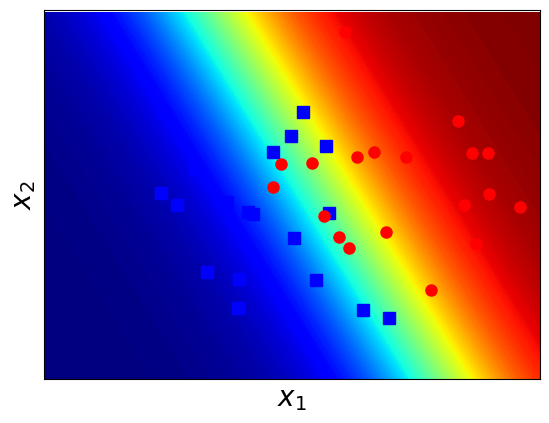

[-6.96181003  1.69487606  1.04023726]


In [34]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
filename = 'logistic_2d.pdf'


X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.zeros(N), np.ones(N)))

# Fit logistic regression model
logReg = LogisticRegression()
logReg.fit(X, y)

# Get coefficients
w = np.array([logReg.intercept_[0], logReg.coef_[0][0], logReg.coef_[0][1]])

# # Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[0]
w1 = w[1]
w2 = w[2]

# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

print(w)


### Nhận xét code tự xây dựng vs thư viện

- Bộ tham số tối ưu: khác nhau 
- Kết quả dự đoán: dự đoán phân lớp không khác nhau
- Độ chính xác: gần tương đương

=> Sự khác nhau trong bộ tham số tối ưu có thể do thuật toán tối ưu hóa, tiêu chí dừng, tốc độ học, hiệu chỉnh của mình dùng khác với thư viện